In [75]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import*
from sklearn.cluster import KMeans

In [76]:
df = pd.read_csv('CC GENERAL.csv')

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
CUST_ID                             8950 non-null object
BALANCE                             8950 non-null float64
BALANCE_FREQUENCY                   8950 non-null float64
PURCHASES                           8950 non-null float64
ONEOFF_PURCHASES                    8950 non-null float64
INSTALLMENTS_PURCHASES              8950 non-null float64
CASH_ADVANCE                        8950 non-null float64
PURCHASES_FREQUENCY                 8950 non-null float64
ONEOFF_PURCHASES_FREQUENCY          8950 non-null float64
PURCHASES_INSTALLMENTS_FREQUENCY    8950 non-null float64
CASH_ADVANCE_FREQUENCY              8950 non-null float64
CASH_ADVANCE_TRX                    8950 non-null int64
PURCHASES_TRX                       8950 non-null int64
CREDIT_LIMIT                        8949 non-null float64
PAYMENTS                            8950 non-null float64
MINIMUM_PAYMENTS            

In [78]:
#313 values missing from the MINIMUM_PAYMENTS column and only 1 missing from CREDIT_LIMIT column.
missing = df.isna().sum()
print(missing)

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64


In [79]:
#Since the number of missing values is low (the total number of samples is 8950), we'll impute with median of the columns.
#droping the customer ID.(not usefull)
df = df.fillna(df["MINIMUM_PAYMENTS"].mean())
df.drop("CUST_ID", axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 17 columns):
BALANCE                             8950 non-null float64
BALANCE_FREQUENCY                   8950 non-null float64
PURCHASES                           8950 non-null float64
ONEOFF_PURCHASES                    8950 non-null float64
INSTALLMENTS_PURCHASES              8950 non-null float64
CASH_ADVANCE                        8950 non-null float64
PURCHASES_FREQUENCY                 8950 non-null float64
ONEOFF_PURCHASES_FREQUENCY          8950 non-null float64
PURCHASES_INSTALLMENTS_FREQUENCY    8950 non-null float64
CASH_ADVANCE_FREQUENCY              8950 non-null float64
CASH_ADVANCE_TRX                    8950 non-null int64
PURCHASES_TRX                       8950 non-null int64
CREDIT_LIMIT                        8950 non-null float64
PAYMENTS                            8950 non-null float64
MINIMUM_PAYMENTS                    8950 non-null float64
PRC_FULL_PAYMENT           

In [80]:
df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


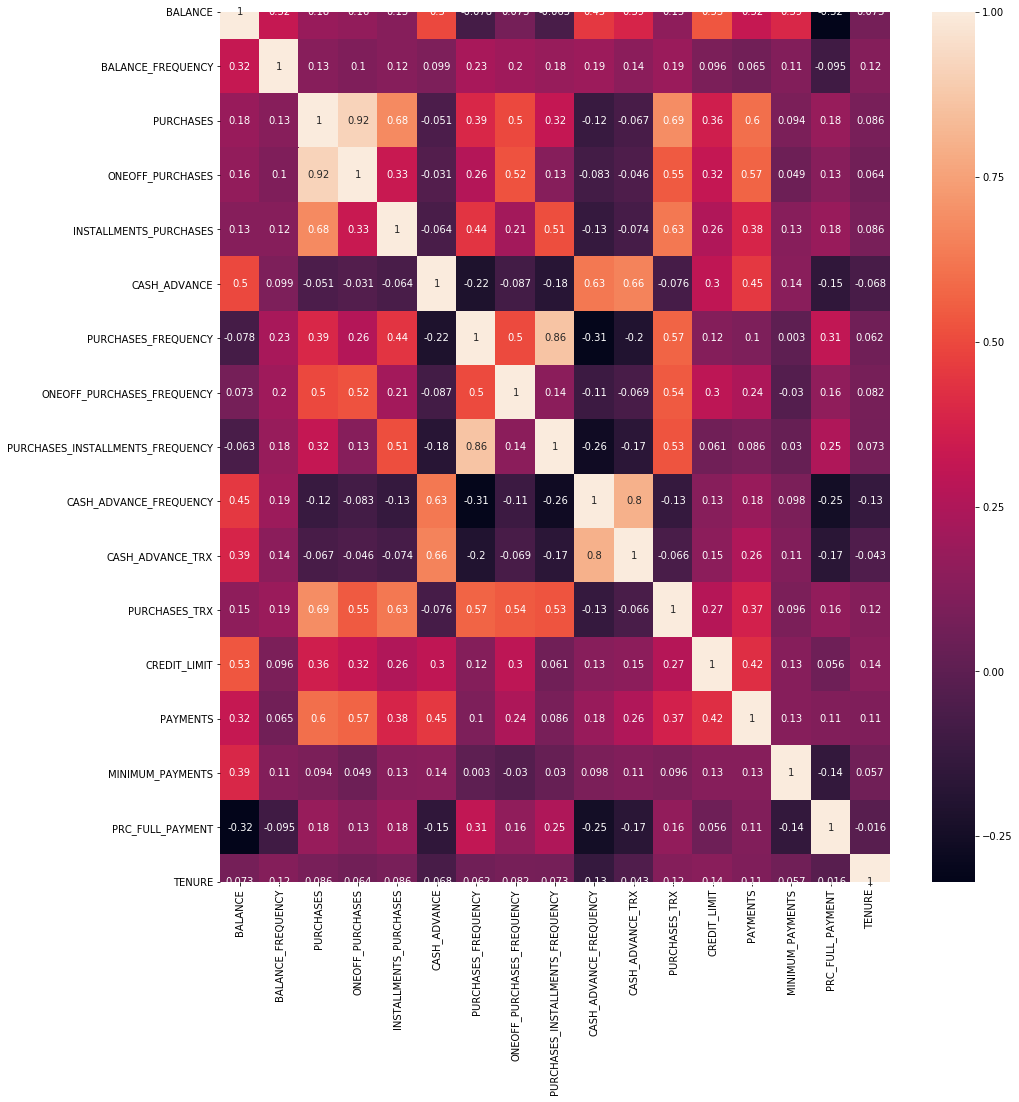

In [81]:
# Compute pairwise correlation of columns, excluding NA/null values, The lighter it is the more correlation between the 2 columns.
pyplot.figure(figsize=(15, 16))
sns.heatmap(df.corr(), annot=True)

# We can notice that[ONEOFF_PURCHASES,PURCHASES	] are the most corelated columns in our df.

In [82]:
df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [83]:
# Feature Scaling.

from sklearn.preprocessing import MinMaxScaler

mms = MinMaxScaler()

cols =  ['BALANCE',
         'PURCHASES',
         'ONEOFF_PURCHASES',
         'INSTALLMENTS_PURCHASES',
         'CASH_ADVANCE',
         'CASH_ADVANCE_TRX',
         'PURCHASES_TRX',
         'CREDIT_LIMIT',
         'PAYMENTS',
         'MINIMUM_PAYMENTS',
        ]

for col in cols:
    df[col] = mms.fit_transform(df[[col]])


    
df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,0.002148,0.818182,0.001945,0.000000,0.00424,0.000000,0.166667,0.000000,0.083333,0.000000,0.00000,0.005587,0.031720,0.003979,0.001826,0.000000,12
1,0.168169,0.909091,0.000000,0.000000,0.00000,0.136685,0.000000,0.000000,0.000000,0.250000,0.03252,0.000000,0.232053,0.080893,0.014034,0.222222,12
2,0.131026,1.000000,0.015766,0.018968,0.00000,0.000000,1.000000,1.000000,0.000000,0.000000,0.00000,0.033520,0.248748,0.012264,0.008210,0.000000,12
3,0.087521,0.636364,0.030567,0.036775,0.00000,0.004366,0.083333,0.083333,0.000000,0.083333,0.00813,0.002793,0.248748,0.000000,0.011310,0.000000,12
4,0.042940,1.000000,0.000326,0.000393,0.00000,0.000000,0.083333,0.083333,0.000000,0.000000,0.00000,0.002793,0.038397,0.013374,0.003204,0.000000,12


In [84]:
# Checking if any features are correlated.

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

for col in df.columns:
    X = df.drop([col], axis=1)
    y = df[col]
    X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42)
    reg = DecisionTreeRegressor()
    reg.fit(X_train,y_train)
    print('Score for {} as dependent variable is: {}'.format(col,reg.score(X_test,y_test)))
    

# We can notice that PURCHASES_FREQUENCY, INSTALLMENTS_PURCHASES, PURCHASES and PURCHASES_INSTALLMENTS_FREQUENCY are the most dependent features.

Score for BALANCE as dependent variable is: 0.8974052811849393
Score for BALANCE_FREQUENCY as dependent variable is: 0.6284405573289995
Score for PURCHASES as dependent variable is: 0.9476012596071577
Score for ONEOFF_PURCHASES as dependent variable is: 0.7933595017502397
Score for INSTALLMENTS_PURCHASES as dependent variable is: 0.8953510975556298
Score for CASH_ADVANCE as dependent variable is: 0.4567600495583567
Score for PURCHASES_FREQUENCY as dependent variable is: 0.9838910991372891
Score for ONEOFF_PURCHASES_FREQUENCY as dependent variable is: 0.8164329985955718
Score for PURCHASES_INSTALLMENTS_FREQUENCY as dependent variable is: 0.9482587057993561
Score for CASH_ADVANCE_FREQUENCY as dependent variable is: 0.712637683699313
Score for CASH_ADVANCE_TRX as dependent variable is: 0.2795538249952404
Score for PURCHASES_TRX as dependent variable is: 0.2677583558984261
Score for CREDIT_LIMIT as dependent variable is: -0.012511671067237273
Score for PAYMENTS as dependent variable is: 0.

In [85]:
from sklearn.decomposition import PCA
pca = PCA(n_components=17)
pca.fit(df)

#Equal to n_components largest eigenvalues of the covariance square matrix.
#pca.explained_variance_

variance_list=pca.explained_variance_ratio_
variance_list

array([7.39960948e-01, 1.35238092e-01, 3.82787234e-02, 3.58362341e-02,
       2.10401638e-02, 1.34346147e-02, 6.68484076e-03, 3.70141885e-03,
       1.81651707e-03, 1.50706931e-03, 8.00710481e-04, 5.23813599e-04,
       3.55262460e-04, 3.35060382e-04, 2.89520575e-04, 1.97001773e-04,
       8.54286496e-09])

In [86]:
sum=0;
y=0;
for i in range(len(variance_list)-12):
    sum+=variance_list[i]
    y+=1

print(sum)
print(y)

0.9703541615094826
5


In [87]:
# Sum of explained variances of the first five components is 97%
pca.explained_variance_ratio_[0]+pca.explained_variance_ratio_[1]+pca.explained_variance_ratio_[2]+pca.explained_variance_ratio_[3]+pca.explained_variance_ratio_[4]

0.9703541615094826

In [88]:
#printing the compontents of the dimension with the explained variance

dimensions = ['Dimension {}'.format(i) for i in range(1,len(pca.components_)+1)]

components = pd.DataFrame(pca.components_,columns=list(df))
components.index = dimensions

variance = pd.DataFrame(pca.explained_variance_ratio_, columns=['Explained Variance'])
variance.index = dimensions


pd.concat([variance,components], axis=1)


,Explained Variance,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
Dimension 1,7.399609e-01,-0.005958,-0.022488,-0.003107,-0.002153,-0.002872,0.002404,-0.023892,-0.020789,-0.026552,0.020876,0.001987,-0.006963,-0.013002,-0.004646,-0.001317,0.002543,-9.985166e-01
Dimension 2,1.352381e-01,-0.019316,0.092079,0.032096,0.019442,0.034744,-0.017500,0.683996,0.237185,0.634669,-0.114278,-0.021722,0.073218,0.025056,0.012032,-0.000449,0.199450,-4.324026e-02
Dimension 3,3.827872e-02,0.114315,0.293792,0.046690,0.057168,-0.001836,0.021645,0.101477,0.812520,-0.393736,0.144911,0.031545,0.064047,0.128765,0.043301,0.004115,-0.156074,-1.602032e-02
Dimension 4,3.583623e-02,-0.164061,-0.365290,0.013244,0.019355,-0.006200,-0.036484,-0.058191,0.229407,-0.274677,-0.255529,-0.054766,-0.004900,0.000629,0.007288,-0.021153,0.798345,9.574851e-03
Dimension 5,2.104016e-02,-0.127258,-0.656286,0.002385,0.007881,-0.009076,-0.066325,0.115677,0.218417,-0.026273,-0.427336,-0.098433,0.011727,-0.069782,-0.040731,-0.008632,-0.536397,-7.035640e-04
Dimension 6,1.343461e-02,0.208082,-0.573830,0.033447,0.024270,0.028929,0.124089,0.007950,0.071092,0.149833,0.679054,0.173889,0.055544,0.267259,0.116356,0.014161,0.045178,1.631734e-02
Dimension 7,6.684841e-03,0.425165,0.048380,0.117628,0.088911,0.095317,0.032525,-0.224659,-0.050697,0.126927,-0.418634,-0.089165,0.117946,0.702186,0.150866,0.048801,0.009719,-2.096101e-02
Dimension 8,3.701419e-03,-0.172168,0.035887,0.137722,0.102926,0.113724,-0.044862,-0.630081,0.336041,0.501024,0.010031,-0.009379,0.278755,-0.276520,0.093499,-0.020664,0.008136,-4.648539e-03
Dimension 9,1.816517e-03,0.681293,-0.072334,0.161151,0.139398,0.098711,0.062290,0.109706,-0.069342,-0.119733,-0.102745,0.005384,0.201810,-0.565759,0.198186,0.160574,0.062792,1.478623e-03
Dimension 10,1.507069e-03,-0.435906,0.044318,0.374987,0.330175,0.219299,0.072267,0.189546,-0.204278,-0.202584,0.026404,0.067864,0.266850,0.071619,0.546353,-0.041640,-0.067104,-3.921678e-04


In [89]:
#Since the variance explained by the first 5 components is approximately 97% we could only use these 5 dimensions.
from sklearn.decomposition import PCA
pca = PCA(n_components=5)
pca.fit(df)
pca.explained_variance_ratio_

array([0.73996095, 0.13523809, 0.03827872, 0.03583623, 0.02104016])

In [90]:
transformed_data = pca.transform(df)
transformed_data = pd.DataFrame(transformed_data,columns=['Dimension 1','Dimension 2',"Dimension 3","Dimension 4","Dimension 5"])
transformed_data.head()

,Dimension 1,Dimension 2,Dimension 3,Dimension 4,Dimension 5
0,-0.462023,-0.494116,-0.138092,0.002597,0.127529
1,-0.455605,-0.637865,-0.042242,0.081955,-0.225900
2,-0.508501,0.282673,0.891810,0.119342,0.293819
3,-0.457157,-0.605739,-0.046179,0.081002,0.195339
4,-0.463980,-0.568402,0.013100,-0.023586,0.012909


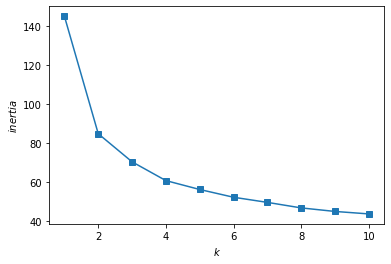

In [91]:
# Use elbow method to find the ideal number of clusters
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42).fit(transformed_data)
    inertia.append(np.sqrt(kmeans.inertia_))

plt.plot(range(1, 11), inertia, marker='s');
plt.xlabel('$k$')
plt.ylabel('$inertia$');

In [92]:
model = KMeans(n_clusters=4)
model.fit(transformed_data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [93]:
# Prediction on the entire data
all_predictions = model.predict(transformed_data)
print(all_predictions)

[2 2 0 ... 1 1 1]


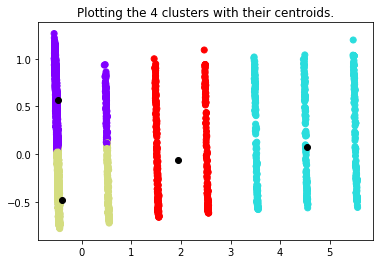

In [94]:
plt.title("Plotting the 4 clusters with their centroids.")
plt.scatter(transformed_data.iloc[:,0],transformed_data.iloc[:,1],c=model.labels_,cmap='rainbow')
plt.scatter(model.cluster_centers_[:,0],model.cluster_centers_[:,1],color='black')
plt.show()